In [1]:
from keras.models import load_model
import cv2
import numpy as np

In [2]:
model=load_model('emotiondetector.h5')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
label_dict={0:'anger', 1:'contempt', 2:'disgust', 3:'fear', 4:'happy', 5:'sadness', 6:'surprise'}
color_dict={0:(0,0,255),1:(0,255,0),2:(255,0,0),3:(0,255,255),4:(255,255,0),5:(255,0,255),6:(255,255,255)}

In [3]:
img=cv2.imread('87642b153138dfb43b0da9cbd3d4da11.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_clsfr.detectMultiScale(gray,1.1,7)     

for (x,y,w,h) in faces:
    
    face_img=gray[y:y+w,x:x+h]
    resized=cv2.resize(face_img,(100,100))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    result=model.predict(reshaped)
    
    label=np.argmax(result,axis=1)[0]
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
    
    cv2.putText(img,label_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255),2)   
    

cv2.imshow('emotion detection',img)
key=cv2.waitKey(0)
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 48ms/step


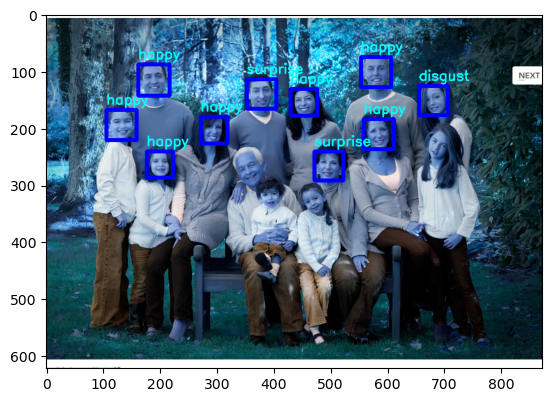

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()

ax.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()